## Set up

In [1]:
import sys

assert sys.version_info >= (3, 7)

In [2]:
from packaging import version
import sklearn

assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

In [3]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [4]:
from pathlib import Path

IMAGES_PATH = Path() / "images" / "linear_regression_img"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## Loading the Penguins Data

In [5]:
import os
import pandas as pd

dataset_path = os.path.join("datasets", "penguins_data")
dataset_fname = "penguins_train_set.csv"

cols = ["species",
       "island",
       "bill_length_mm",
       "bill_depth_mm",
       "flipper_length_mm",
       "body_mass_g",
       "sex",
       "year",]

penguins_details = pd.read_csv(os.path.join(dataset_path, dataset_fname), names=cols, header=None)

## Data Cleaning

In [6]:
import numpy as np

penguins_copy = penguins_details

penguins_copy.fillna(method='ffill', inplace=True)

In [7]:
penguins_copy = penguins_copy.drop(index=0)

In [8]:
penguins_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 1 to 344
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   species            344 non-null    object
 1   island             344 non-null    object
 2   bill_length_mm     344 non-null    object
 3   bill_depth_mm      344 non-null    object
 4   flipper_length_mm  344 non-null    object
 5   body_mass_g        344 non-null    object
 6   sex                344 non-null    object
 7   year               344 non-null    object
dtypes: object(8)
memory usage: 21.6+ KB


## Species count

In [9]:
print(penguins_copy.groupby('species').size())

species
Adelie       152
Chinstrap     68
Gentoo       124
dtype: int64


In [10]:
from sklearn.preprocessing import LabelEncoder

numerical_data = penguins_copy[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]
categorical_data = penguins_copy[['species', 'island', 'sex', 'year']]

In [11]:
numerical_data

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
1,39.1,18.7,181,3750
2,39.5,17.4,186,3800
3,40.3,18,195,3250
4,40.3,18,195,3250
5,36.7,19.3,193,3450
...,...,...,...,...
340,55.8,19.8,207,4000
341,43.5,18.1,202,3400
342,49.6,18.2,193,3775
343,50.8,19,210,4100


In [12]:
categorical_data

,species,island,sex,year
1,Adelie,Torgersen,male,2007
2,Adelie,Torgersen,female,2007
3,Adelie,Torgersen,female,2007
4,Adelie,Torgersen,female,2007
5,Adelie,Torgersen,female,2007
...,...,...,...,...
340,Chinstrap,Dream,male,2009
341,Chinstrap,Dream,female,2009
342,Chinstrap,Dream,male,2009
343,Chinstrap,Dream,male,2009


## Mapping species to numerical values

In [13]:
X = np.array([[float(x[0]), float(x[1])] for x in numerical_data[["bill_length_mm", "bill_depth_mm"]].values])
y = categorical_data[["species"]].values



y_prepared = []
for i in range (0, 344):
    if(y[i] == "Adelie"):
        y_prepared.append(0)
    elif(y[i] == "Gentoo"):
        y_prepared.append(1)
    elif(y[i] == "Chinstrap"):
        y_prepared.append(2)

In [14]:
y_prepared

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [15]:
y = y.reshape(-1)

## Making a Pipeline

In [16]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

imputer = SimpleImputer(strategy="median")
num_pipeline = make_pipeline(imputer, StandardScaler())

## Linear Grid Search

In [17]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'C':[i for i in range(10, 101, 10)]},
]
prepared_x = num_pipeline.fit_transform(X)
                                        
svc = SVC(kernel='linear')

gs = GridSearchCV(svc, param_grid)
gs.fit(prepared_x, y)

print(gs.best_params_)

{'C': 10}


In [18]:
svc = SVC(kernel='linear', C=gs.best_params_['C'])
linear_clf = make_pipeline(num_pipeline, svc)

## Linear SVM Classification

In [19]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets

# training the model
linear_clf.fit(X, y)

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('simpleimputer',
                                  SimpleImputer(strategy='median')),
                                 ('standardscaler', StandardScaler())])),
                ('svc', SVC(C=10, kernel='linear'))])

## Linear SVM Confusion Matrix

In [20]:
from sklearn.model_selection import cross_val_predict


y_pred = cross_val_predict(linear_clf, X, y, cv=4)

In [21]:
from sklearn.metrics import confusion_matrix

linear_clf.predict(X)==y
cm = confusion_matrix(y, y_pred)

cm

array([[149,   3,   0],
       [  4,  61,   3],
       [  0,   4, 120]], dtype=int64)

In [37]:
# True positives rate
total = 149+61+120
linear_rate = total/344

linear_rate*100

95.93023255813954

## Polynomial Grid Search

In [23]:
param_grid = [
    {'C':[i for i in range(10, 81, 10)], 'degree':[i for i in range(1, 7)], 'coef0':[i for i in range(2, 10, 2)]},
]
prepared_x = num_pipeline.fit_transform(X)
                                        
poly_svc = SVC(kernel='poly')

gs = GridSearchCV(poly_svc, param_grid)
gs.fit(prepared_x, y)

print(gs.best_params_)

{'C': 40, 'coef0': 4, 'degree': 3}


## Polynomial Kernel

In [24]:
from sklearn.svm import SVC
from sklearn.preprocessing import PolynomialFeatures

poly_svc = SVC(kernel="poly", degree=3, coef0=4, C=40)

In [25]:
poly_clf = make_pipeline(StandardScaler(), poly_svc)

In [26]:
poly_clf.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=40, coef0=4, kernel='poly'))])

## Polynomial Confusion Matrix

In [39]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict


y_pred = cross_val_predict(poly_clf, X, y, cv=4)

poly_clf.predict(X)==y
cm = confusion_matrix(y, y_pred)

cm

array([[148,   4,   0],
       [  5,  60,   3],
       [  0,   6, 118]], dtype=int64)

In [40]:
# True positives rate
total = 148+60+118
poly_rate = total/344

poly_rate*100

94.76744186046511

## Gaussian Grid Search

In [29]:
# Curvature in a decision boundary
param_grid = [
    {'C':[i for i in range(10, 101, 10)], 'gamma':[i / 10.0 for i in range(1, 50)]}
]
prepared_x = num_pipeline.fit_transform(X)
                                        
gaussian_svc = SVC(kernel='rbf')

gs = GridSearchCV(gaussian_svc, param_grid)
gs.fit(prepared_x, y)

print(gs.best_params_)

{'C': 10, 'gamma': 1.3}


## Gaussian Kernel

In [45]:
gaussian_svc = SVC(kernel='rbf', C=gs.best_params_['C'], gamma=gs.best_params_['gamma'])
gaussian_clf = make_pipeline(num_pipeline, gaussian_svc)

gaussian_clf = make_pipeline(num_pipeline, gaussian_svc)
gaussian_clf.fit(X, y)

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('simpleimputer',
                                  SimpleImputer(strategy='median')),
                                 ('standardscaler', StandardScaler())])),
                ('svc', SVC(C=10, gamma=1.3))])

## Gaussian Kernel Confusion Matrix

In [46]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict


y_pred = cross_val_predict(gaussian_clf, X, y, cv=4)

gaussian_clf.predict(X)==y
cm = confusion_matrix(y, y_pred)

cm

array([[148,   4,   0],
       [  6,  61,   1],
       [  0,   3, 121]], dtype=int64)

In [48]:
# True positives rate
total = 148+61+121
gaussian_rate = total/344

gaussian_rate*100

95.93023255813954

## Plot Linear, Polynomial and RBF Graphs

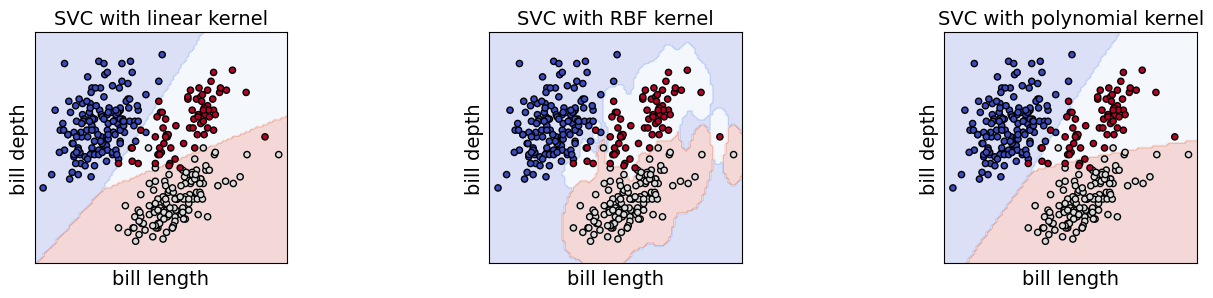

In [41]:
import matplotlib.pyplot as plt
from sklearn import datasets, svm
from sklearn.inspection import DecisionBoundaryDisplay


C_linear = 10.0  # SVM regularization parameter
C_poly = 40.0  # SVM regularization parameter
C_rbf = 8.0  # SVM regularization parameter
models = (
    svm.SVC(kernel="linear", C=C_linear),
    svm.SVC(kernel="rbf", gamma=1.3, C=C_poly),
    svm.SVC(kernel="poly", degree=3, gamma="auto", C=C_rbf),
)
models = (clf.fit(X, y) for clf in models)

# title for the plots
titles = (
    "SVC with linear kernel",
     "SVC with RBF kernel",
     "SVC with polynomial kernel",
)

# Set-up 2x2 grid for plotting.
#fig, sub = plt.subplots(1, 3)
fig, sub = plt.subplots(ncols=3, figsize=(15, 3), sharey=True)
plt.subplots_adjust(wspace=0.8, hspace=0.8)

X0, X1 = X[:, 0], X[:, 1]

for clf, title, ax in zip(models, titles, sub.flatten()):
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        response_method="predict",
        cmap=plt.cm.coolwarm,j
        alpha=0.2,
        ax=ax,
        xlabel="bill length",
        ylabel="bill depth",
    )
    ax.scatter(X0, X1, c=y_prepared, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()